In [12]:
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import keras
from yolov5 import YOLOv5
import cv2

YOLOv5  2024-9-14 Python-3.12.3 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 214 layers, 7035811 parameters, 0 gradients, 16.0 GFLOPs
Adding AutoShape... 


<class 'yolov5.models.common.Detections'>


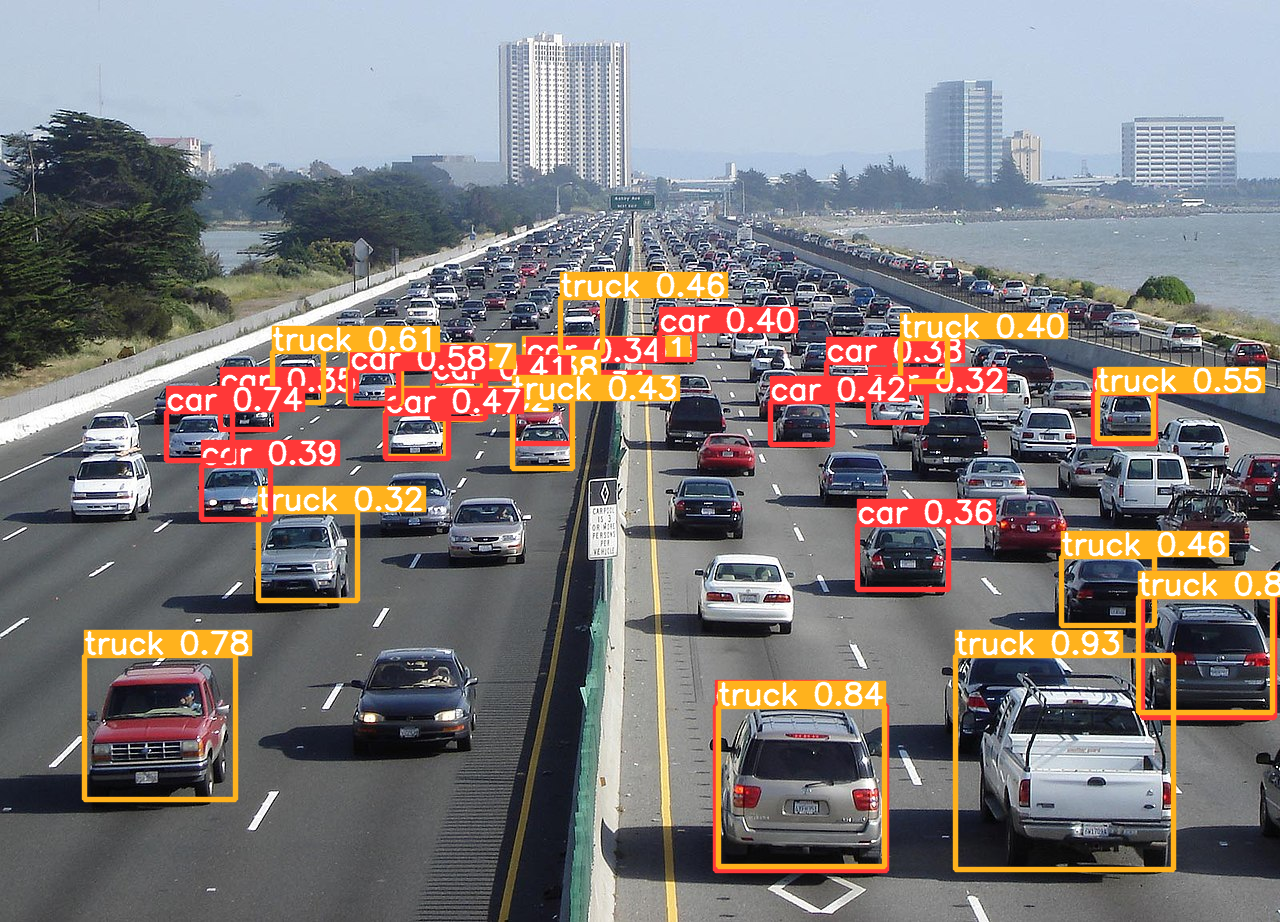

In [13]:
from ultralytics import YOLO
import cv2
import pathlib
import yolov5

# Handle path compatibility
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath  # Redirect PosixPath to WindowsPath

# Load the model
model_path = r"E:\Personal_Project\Hệ thống giám sát giao thông\model\vehicle_detection\best.pt"
model = yolov5.load(model_path)

# Set model parameters (if supported by the API)
model.conf = 0.3  # NMS confidence threshold
model.iou = 0.3  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

# Restore original pathlib.Path
pathlib.PosixPath = temp

# Load and preprocess the image
image_test_path = r'E:\Personal_Project\Hệ thống giám sát giao thông\data\experiment\I-80_Eastshore_Fwy.jpg'
img_test = cv2.imread(image_test_path)
img_rgb = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

# Perform object detection
results = model(img_rgb)

# Check the type of results
print(type(results))

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

# show detection bounding boxes on image
results.show()


In [15]:
from ultralytics import YOLO
import cv2
import pathlib
import yolov5

# Handle path compatibility
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath  # Redirect PosixPath to WindowsPath

# Load the model
model_path = r"E:\Personal_Project\Hệ thống giám sát giao thông\model\yolov5s.pt"
model = yolov5.load(model_path)

# Set model parameters (if supported by the API)
# model.conf = 0.3  # NMS confidence threshold
# model.iou = 0.3  # NMS IoU threshold
# model.agnostic = False  # NMS class-agnostic
# model.multi_label = False  # NMS multiple labels per box
# model.max_det = 1000  # maximum number of detections per image

# Restore original pathlib.Path
pathlib.PosixPath = temp

# Load video
video_path = r'E:\Personal_Project\Hệ thống giám sát giao thông\data\experiment\0915(7).mp4'
video_capture = cv2.VideoCapture(video_path)

# Define video writer to save the output
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 video writing
output_path = r'E:\Personal_Project\Hệ thống giám sát giao thông\data\experiment\output3.mp4'
video_writer = cv2.VideoWriter(output_path, fourcc, video_capture.get(cv2.CAP_PROP_FPS), 
                               (int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)), 
                                int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while video_capture.isOpened():
    ret, frame = video_capture.read()
    if not ret:
        break
    
    # Convert the frame to RGB
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Perform object detection
    results = model(img_rgb)
    
    # Draw bounding boxes on the frame
    frame_with_boxes = results.render()[0]
    
    # Convert frame_with_boxes back to BGR for saving
    frame_with_boxes_bgr = cv2.cvtColor(frame_with_boxes, cv2.COLOR_RGB2BGR)
    
    # Write the frame with bounding boxes to the output video
    video_writer.write(frame_with_boxes_bgr)
    
    # Optionally display the frame with bounding boxes
    cv2.imshow('Detection', frame_with_boxes_bgr)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
video_capture.release()
video_writer.release()
cv2.destroyAllWindows()


YOLOv5  2024-9-14 Python-3.12.3 torch-2.3.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 270 layers, 7235389 parameters, 0 gradients, 16.6 GFLOPs
Adding AutoShape... 
